In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# initialize the data as separate rows for the regression
ages = np.array([35, 29, 34, 32, 28, 28, 24, 24, 28, 26, 26, 26])
weights = np.array([9.1, 8.9, 8.5, 7.4, 7.5, 7.3, 6.7, 6.5, 7.2, 6.5, 6.6, 7.1])
smoking_status = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:

# construct matrix A and vector y
A = np.vstack([np.ones(len(ages)), ages, smoking_status]).T
y = weights

In [4]:

# solve the least squares problem
x, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)


Q, R = np.linalg.qr(A)
x = np.linalg.solve(R, Q.T @ y)


In [5]:

aSmokers = ages[smoking_status == 1]
wSmokers = weights[smoking_status == 1]
aHealthy = ages[smoking_status == 0]
wHealthy = weights[smoking_status == 0]

In [6]:

coef_smokers = np.polyfit(aSmokers, wSmokers, 1)
coef_healthy = np.polyfit(aHealthy, wHealthy, 1)


In [7]:

ages_line = np.linspace(ages.min(), ages.max(), 100)
regression_line_smokers = np.polyval(coef_smokers, ages_line)
regression_line_healthy = np.polyval(coef_healthy, ages_line)


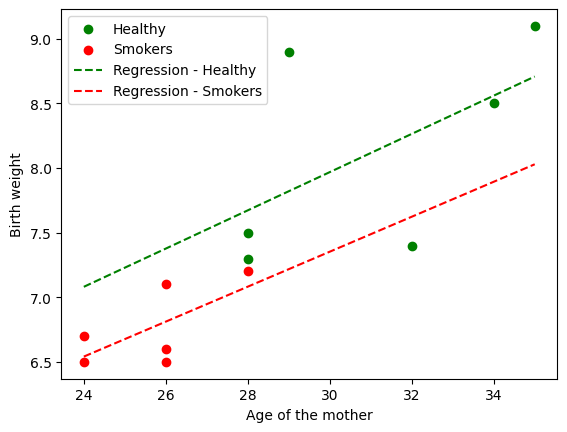

In [8]:

plt.scatter(aHealthy, wHealthy,
            color='green', label='Healthy')

plt.scatter(aSmokers, wSmokers,
            color='red', label='Smokers')


plt.plot(ages_line, regression_line_healthy,
         color='green', linestyle='--', label='Regression - Healthy')

plt.plot(ages_line, regression_line_smokers,
         color='red', linestyle='--', label='Regression - Smokers')


plt.xlabel('Age of the mother')
plt.ylabel('Birth weight')
plt.legend()
plt.show()
